# <center style="color: red"> COLOR COMPRESSION USING K-MEANS</center>

- Sinh viên: Phan Thanh An
- Mã số sinh viên: 21127003
- Lớp: 21CLC07

## Mục lục
* [1. Ý tưởng thực hiện](#c0)
* [2. Import các thư viện được phép sử dụng](#c1)
* [3. Ảnh gốc ban đầu cần nén màu](#c2)
    * [3.1 Đếm số lượng màu của bức ảnh ban đầu](#c21)
* [4. Xây dựng class KMeansImageReducer](#c3)
* [5. Xây dựng hàm để chạy test](#c4)
* [6. Thử nghiệm và nhận xét](#c5)
    * [6.1. Test 1: N = 3](#c51)
    * [6.2. Test 2: N = 5](#c52)    
    * [6.3. Test 3: N = 7](#c53)    
    * [6.4. Test 4: N = 16](#c54)    
 * [7. Nhận xét](#c6)
 * [8. Tài liệu tham khảo](#c7) 

## <a class="anchor" id="c0">1. Ý tưởng thực hiện</a>
- 1. Chuyển đổi hình ảnh từ không gian màu ban đầu của nó sang không gian màu RGB
- 2. Làm phẳng hình ảnh thành một mảng 2D, trong đó mỗi hàng biểu thị một pixel và mỗi cột biểu thị một kênh màu (Red, Green hoặc Blue).
- 3. Áp dụng phân cụm K-means cho mảng hình ảnh được làm phẳng, với K đại diện cho số lượng màu mong muốn trong hình ảnh được nén. Thuật toán sẽ nhóm các pixel tương tự lại với nhau dựa trên giá trị RGB của chúng và gán cho mỗi nhóm một giá trị RGB trung bình.

![img](images/img_demo.png)
<center>Các điểm sau khi thực hiện kmeans với k = 3</center>

- 4. Thay thế từng pixel trong ảnh gốc bằng giá trị RGB trung bình của cụm được chỉ định. Điều này sẽ tạo ra một hình ảnh có ít màu hơn nhưng có hình thức tổng thể tương tự như hình gốc.
- 5. Chuyển đổi hình ảnh đã nén trở lại không gian màu ban đầu nếu cần.
- 6. Bây giờ bằng cách điều chỉnh giá trị của K, số lượng cụm được sử dụng để nén, mức độ nén có thể được kiểm soát. 


## <a class="anchor" id="c1">2. Import các thư viện được phép sử dụng</a>


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## <a class="anchor" id="c2">3. Ảnh gốc ban đầu cần nén màu</a>
![img](images/img_test_2.jpg)

### <a class="anchor" id="c21">3.1. Đếm số lượng màu của bức ảnh ban đầu</a>
Hàn đếm số lượng màu sắc duy nhất: Bằng cách sử dụng hàm np.unique(), chương trình sẽ tính toán số lượng các giá trị duy nhất trong mảng pixel_values. Điều này tương đương với việc đếm số lượng màu sắc duy nhất trong bức ảnh.

Kết quả cho ra với bức ảnh trên là <b>267308</b> màu

In [2]:
def count_unique_colors(image):
    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Reshape the image array to a 2D array of pixels
    pixel_values = image_array.reshape(-1, image_array.shape[-1])

    # Count the unique colors in the image
    unique_colors = np.unique(pixel_values, axis=0)

    return len(unique_colors)

image_path = "images/img_test_2.jpg"
image = Image.open(image_path)
unique_colors_count = count_unique_colors(image)
print(f"Số lượng màu của bức ảnh là: {unique_colors_count}")

Số lượng màu của bức ảnh là: 267308


## <a class="anchor" id="c3"> 4. Xây dựng class KMeansImageReducer </a>

In [3]:
class KMeansImageReducer:
    def __init__(self, image_path):
        self.image_path = image_path
        
        # Load the image from the given path
        self.image = Image.open(self.image_path)

    def kmeans(self, image_2d, n_colors, max_iters=20):
        # Initialize random initial cluster centers
        centers = image_2d[np.random.choice(range(len(image_2d)), n_colors, replace=False)]

        for _ in range(max_iters):
            # Compute squared Euclidean distances from data points to cluster centers
            distances_sq = np.sum((image_2d[:, np.newaxis] - centers) ** 2, axis=-1)

            # Assign labels to data points based on the nearest center
            labels = np.argmin(distances_sq, axis=-1)

            # Update cluster centers
            new_centers = np.array([image_2d[labels == k].mean(axis=0) for k in range(n_colors)])

            # Check for convergence
            if np.all(centers == new_centers):
                break

            centers = new_centers

        # Predict color labels for each data point
        labels = np.argmin(np.linalg.norm(image_2d[:, np.newaxis] - centers, axis=-1), axis=-1)

        # Get the color centers for each label
        colors = centers

        # Reduce the image colors
        reduced_image = colors[labels].reshape(self.image_array.shape)

        return reduced_image

    def reduce_colors(self, n_colors, max_iters=20):
        # Convert image to a NumPy array
        self.image_array = np.array(self.image)

        # Convert the image to a 2D array
        image_2d = self.image_array.reshape(-1, 3).astype(float)

        # Apply k-means to reduce colors
        reduced_image = self.kmeans(image_2d, n_colors, max_iters)

        return reduced_image

    def show_reduced_image(self, reduced_image):
        plt.imshow(reduced_image.astype(np.uint8))
        plt.title('Ảnh sau khi đã giảm số lượng màu')
        plt.show()

Phương thức ```kmeans``` trong lớp ```KMeansImageReducer``` thực hiện thuật toán ```K-means``` để giảm số lượng màu trong hình ảnh. 
#### Tham số:
- ```image_2d```: Một mảng hai chiều chứa thông tin màu sắc của từng điểm ảnh trong hình ảnh. Được truyền từ phương thức reduce_colors.
- ```n_colors```: Số lượng màu sau khi giảm số lượng. Được truyền từ phương thức reduce_colors.
- ```max_iters```: Số lần lặp tối đa để tìm các trung tâm cụm. Giá trị mặc định là 20.

#### Các bước trong thuật toán K-means:
- 1. Khởi tạo trung tâm cụm: Tạo ngẫu nhiên ```n_colors``` trung tâm cụm ban đầu từ dữ liệu ảnh ```image_2d```.
- 2. Lặp qua ```max_iters``` lần:
    - 2.1 Phân loại điểm dữ liệu: Tính toán khoảng cách ```Euclidean``` bình phương từ từng điểm dữ liệu đến các trung tâm cụm hiện tại, và gán nhãn cho từng điểm dữ liệu dựa trên trung tâm gần nhất.
    - 2.2 Cập nhật trung tâm cụm: Tính toán trung bình của các điểm dữ liệu thuộc cùng một cụm và sử dụng nó để cập nhật trung tâm cụm mới.
- 3. Dừng khi hội tụ: Nếu các trung tâm cụm không thay đổi nhiều giữa các lần lặp, thuật toán dừng và tiến hành dự đoán nhãn cho từng điểm dữ liệu cuối cùng.
- 4. Dự đoán nhãn cuối cùng: Sử dụng các trung tâm cụm cuối cùng để dự đoán nhãn cho từng điểm dữ liệu.
- 5. Giảm số lượng màu: Sử dụng các trung tâm cụm cuối cùng và các nhãn dự đoán để giảm số lượng màu trong hình ảnh ban đầu.
- 6. Trả về hình ảnh sau khi giảm số lượng màu: Trả về hình ảnh đã giảm số lượng màu với các màu sắc mới dựa trên các trung tâm cụm cuối cùng.

## <a class="anchor" id="c4">5. Xây dựng hàm để chạy test </a>
#### Tham số:
- ```image_path```: Đường dẫn đến hình ảnh cần giảm số lượng màu.
- ```n_colors```: Số lượng màu sau khi giảm số lượng.
- ```max_iters```: Số lần lặp tối đa để tìm các trung tâm cụm. Giá trị mặc định là 20.

#### Kết quả:
- In ra ảnh sau khi đã giảm màu
- Cho biết các màu được chọn để biểu diễn ảnh sau khi giảm
- In ra số lượng màu của ảnh đã giảm (mục đích để đồng kiểm với n_colors truyền vào)

In [4]:
def reduce_color(image_path, n_colors, max_iters=20):
    print("Vui lòng chờ trong giây lát..")
    reducer = KMeansImageReducer(image_path)
    reduced_image = reducer.reduce_colors(n_colors, max_iters)
    reducer.show_reduced_image(reduced_image)
    
    print("Các màu được chọn thể hiện bức ảnh")

    # Convert the image to a NumPy array
    image_array = np.array(reduced_image)

    # Reshape the image array to a 2D array of pixels
    pixel_values = image_array.reshape(-1, reduced_image.shape[-1])

    # Count the unique colors in the image
    unique_colors = np.unique(pixel_values, axis=0)
    
    print(unique_colors)
    
    unique_colors_count = count_unique_colors(reduced_image)
    print(f"Số lượng màu của bức ảnh là: {unique_colors_count}")

##  <a class="anchor" id="c5">6. Thử nghiệm và nhận xét </a>

### <a class="anchor" id="c51">6.1. Test 1: N = 3</a>

Vui lòng chờ trong giây lát..


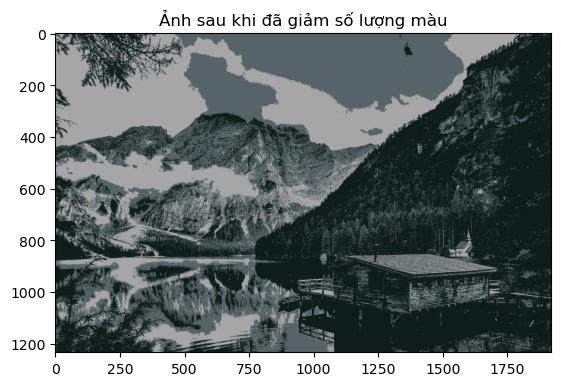

Các màu được chọn thể hiện bức ảnh
[[ 14.03365428  29.95524586  26.69952564]
 [ 86.70307728 100.42644899 103.79026963]
 [166.4204511  166.72449292 167.18481405]]
Số lượng màu của bức ảnh là: 3


In [5]:
reduce_color("images/img_test_2.jpg", n_colors=3)

<b>Với ```n_colors = 3```, thuật toán Kmean cho ra được bức ảnh vẫn giữ được cấu trúc tuy nhiên một số vật thể như mây và cây cối chỉ thể bằng những mảng màu đơn, chưa thể hiện được chi tiết những vật thể.</b>

### <a class="anchor" id="c52">6.2. Test 2: N = 5</a>

Vui lòng chờ trong giây lát..


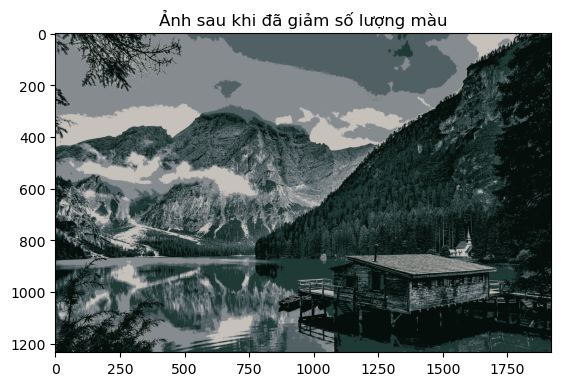

Các màu được chọn thể hiện bức ảnh
[[  5.49569883  14.28285709  11.84763053]
 [ 31.16518806  57.2095111   52.79171379]
 [ 81.13034138  96.01394974 100.05104565]
 [133.58468311 139.24881808 143.89567923]
 [199.67648961 193.16888596 188.02021775]]
Số lượng màu của bức ảnh là: 5


In [6]:
reduce_color("images/img_test_2.jpg", n_colors=5)

<b>Với ```n_colors = 5```, ta thấy có sự cải thiện so với ```n_colors = 3```, các mảng mây đã được định hình rõ nét hơn, tuy nhiên vẫn chưa có độ chi tiết, gram màu chính toàn cục bức ảnh vẫn là những màu tối, chưa thể hiện được màu sắc tươi sáng của bức ảnh gốc.</b>

### <a class="anchor" id="c53">6.3. Test 3: N = 7</a>

Vui lòng chờ trong giây lát..


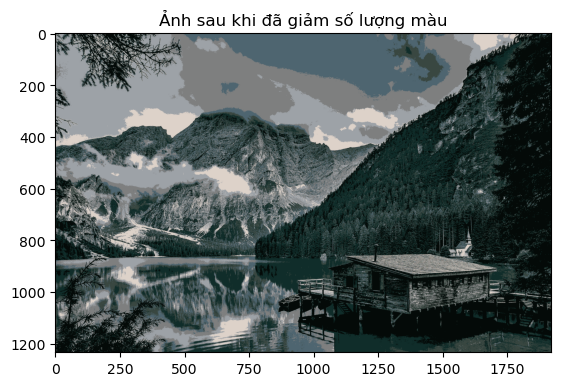

Các màu được chọn thể hiện bức ảnh
[[  4.77953628  10.6731015    8.02712392]
 [ 16.22939247  45.69065743  42.58594636]
 [ 57.94967132  71.42791968  65.53875968]
 [ 78.42486859 101.13337087 112.37163223]
 [126.90761089 127.81587043 127.85390956]
 [157.83001902 162.56959396 167.45647694]
 [221.16923649 210.74615823 201.20759365]]
Số lượng màu của bức ảnh là: 7


In [7]:
reduce_color("images/img_test_2.jpg", n_colors=7)

<b>Với ```n_colors = 7```, bức ảnh có đôi chút cải thiện nhưng vẫn chưa đáng kể, do số lượng màu gốc khá lớn, nên đối với ```n_colors <= 7``` thuật toán chỉ thể hiện các tông màu tối, các mảng màu sáng chưa thể hiện được.</b>

### <a class="anchor" id="c54">6.4. Test 4: N = 16</a>

Vui lòng chờ trong giây lát..


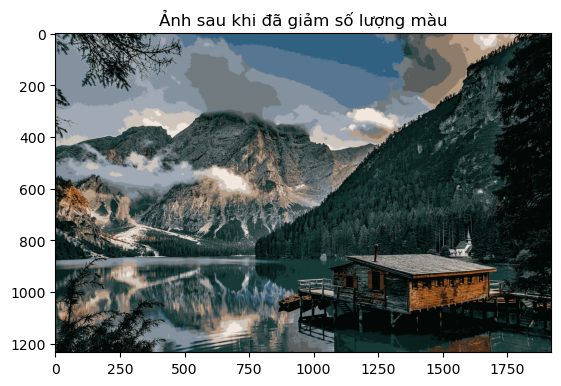

Các màu được chọn thể hiện bức ảnh
[[  3.33613844   7.79255701   5.02059961]
 [ 10.10959968  32.14673696  30.5230553 ]
 [ 23.09712457  58.45170607  54.25256866]
 [ 49.81041222  97.50813287 128.92462156]
 [ 54.77340972  75.65936598  74.28355421]
 [ 74.18048092  45.5176041   26.07043715]
 [ 86.14821397 118.51763812 145.54546624]
 [ 90.32387292  95.73122258  93.14700379]
 [112.87875763 122.15530978 127.43184898]
 [132.19086501 146.586553   159.36099901]
 [143.3602016  124.55883444 107.20040464]
 [161.65967172 170.15662976 180.04410062]
 [169.43198725  92.16562168  29.24829968]
 [184.07557397 158.78066658 133.60476799]
 [205.79217314 196.00260648 188.19647445]
 [241.31667536 231.57697979 222.30276978]]
Số lượng màu của bức ảnh là: 16


In [8]:
reduce_color("images/img_test_2.jpg", n_colors=16)

<b>Với ```n_colors = 16```, lúc này các tông màu sáng hơn (ngôi nhà, các đám mây và mảng rừng xanh) đã được thể hiện rõ hơn, tuy nhiên các mảng mây vẫn còn bị nhiễu màu. Kết quả cho ra với ```n_colors = 16``` có độ tương đồng chấp nhận được so với ảnh gốc.</b>

##  <a class="anchor" id="c6">7. Nhận xét </a>
#### Ưu điểm:

- Tốc độ: K-means là một thuật toán có tốc độ xử lý nhanh, đặc biệt là khi áp dụng cho ảnh có kích thước lớn. Điều này làm cho nó trở thành một lựa chọn hấp dẫn cho việc nén ảnh trên cả máy tính cá nhân và các hệ thống có tài nguyên hạn chế.
    + Độ phức tạp là O(tkn) trong đó:
       + n: là số điểm trong không gian dữ liệu
       + t: là số lần lập (max_iter)
       + k: là số cụm cần phân hoạch
- Bảo đảm hội tụ sau một số bước lặp hữu hạn.

- Đơn giản: Thuật toán K-means dễ hiểu và thực hiện. Nó không đòi hỏi quá nhiều tham số phức tạp và ít dễ dàng để triển khai.

- Các cụm luôn tách biệt: không có 1 điểm xuất hiện cùng lúc trong cả 2 cụm.

- Hiệu quả đối với ảnh đơn sắc: K-means có thể cho kết quả nén tốt khi áp dụng cho các ảnh đơn sắc hoặc ảnh có một số khu vực lớn có cùng màu sắc. Trong những trường hợp này, nó giúp giảm số lượng màu sắc mà không làm mất đi quá nhiều thông tin.

- Dễ dàng kiểm soát số lượng màu: Bằng cách điều chỉnh số lượng màu n_colors, người dùng có thể kiểm soát độ chi tiết của ảnh giảm màu và tối ưu hóa kích thước tệp đầu ra.

#### Nhược điểm:

- Mất mát thông tin: Việc giảm số lượng màu có thể dẫn đến mất mát thông tin quan trọng trong ảnh gốc, đặc biệt là các chi tiết nhỏ và các sắc thái màu sắc tinh tế.

- Hiệu suất trên mọi loại ảnh: K-means không luôn hiệu quả trên tất cả các loại ảnh. Trong một số trường hợp, nó có thể tạo ra ảnh giảm màu không chất lượng hoặc không giảm kích thước tệp một cách đáng kể.

- Cần lựa chọn số lượng màu phù hợp: Để đạt được kết quả nén tốt, người dùng cần phải thử nghiệm và lựa chọn số lượng màu (n_colors) phù hợp. Việc chọn một số lượng màu không phù hợp có thể làm mất tính đa dạng màu sắc của ảnh hoặc không giảm được kích thước tệp đáng kể.

- Phụ thuộc vào giá trị khởi tạo: Hiệu suất của K-means phụ thuộc vào các giá trị khởi tạo ban đầu của các trung tâm gom nhóm. Trong một số trường hợp, việc khởi tạo không tốt có thể dẫn đến kết quả nén không tối ưu.

##  <a class="anchor" id="c7">8. Tài liệu tham khảo </a>
- https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
- https://appliedmachinelearning.wordpress.com/2017/03/08/image-compression-using-k-means-clustering/